In [2]:
import pandas as pd
import smote_variants as sv
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

## wine qualuty data 
資料來源:https://www.kaggle.com/rajyellow46/wine-quality/downloads/wine-quality.zip/1

In [19]:
##讀入酒類品質資料，並進行處理
data = pd.read_csv("wine_quality.csv")
data=data.drop('type',axis=1)
data=data.drop('wine_type',axis=1)
data=data.dropna()
x_wine,y_wine=data.drop('quality',axis=1),data['quality']
x_wine_np=np.array(x_wine)
y_wine_np=np.array(y_wine)
np.unique(y_wine_np)
type(data['quality'])

pandas.core.series.Series

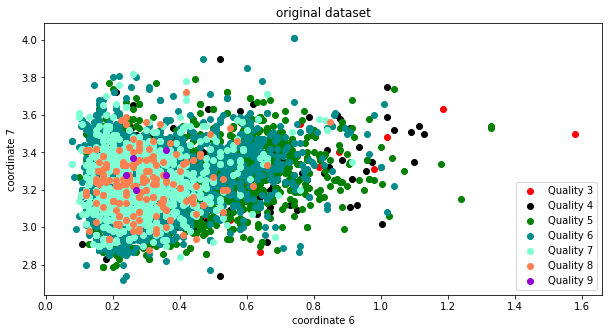

In [83]:
##酒類品質資料一開始各類型況
# Plotting the dataset to illustrate its imbalanced nature. Only the first two coordinates are plotted.
colors= ['orange', 'olive', 'blue','red','black','green','darkcyan','aquamarine','coral','darkviolet']

plt.figure(figsize=(10, 5))
for i in np.unique(y_wine_np):
    plt.scatter(x_wine_np[y_wine_np == i][:,2], x_wine_np[y_wine_np == i][:,9], label='Quality %d' % i, c= colors[i])
plt.title('original dataset')
plt.xlabel('coordinate 6')
plt.ylabel('coordinate 7')
plt.legend()

In [56]:
##酒類品質資料各類目前有的數量
# printing the number of samples

for i in np.unique(y_wine_np):
    print("quality %d - samples: %d" % (i, np.sum(y_wine_np == i)))

quality 3 - samples: 30
quality 4 - samples: 214
quality 5 - samples: 2128
quality 6 - samples: 2820
quality 7 - samples: 1074
quality 8 - samples: 192
quality 9 - samples: 5


In [96]:
##選擇使用的smote方法
# chosing an oversampler supporting multiclass oversampling

oversampler= sv.MulticlassOversampling(sv.ANS())

In [97]:
##抽樣
X_samp_wine, y_samp_wine= oversampler.sample(x_wine_np, y_wine_np)

2019-08-20 11:14:29,333:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 11:14:29,334:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 11:14:29,336:INFO:ANS: Running sampling via ('ANS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-08-20 11:14:29,964:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 11:14:29,965:INFO:ANS: Running sampling via ('ANS', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
2019-08-20 11:14:30,389:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 11:14:30,390:INFO:ANS: Running sampling via ('ANS', "{'proportion': 0.3160320155226777, 'n_jobs': 1}")
2019-08-20 11:14:30,554:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 11:14:30,557:INFO:ANS: Running sampling via ('ANS', "{'proportion': 0.237012987012987, 'n_jobs': 1}")
2019-08-20 11:14:30,721:INFO:MulticlassOversampling: Sampling minor

In [98]:
##抽樣後的各類數量
# printing the number of samples

for i in np.unique(y_samp_wine):
    print("quality %d - samples: %d" % (i, np.sum(y_samp_wine == i)))

quality 3 - samples: 2820
quality 4 - samples: 2820
quality 5 - samples: 2820
quality 6 - samples: 2820
quality 7 - samples: 2820
quality 8 - samples: 2820
quality 9 - samples: 5


In [99]:
##有多少是由新增的
# filtering for new samples

X_samp_wine, y_samp_wine= X_samp_wine[len(x_wine_np):], y_samp_wine[len(y_wine_np):]

In [100]:
# printing the number of new samples

for i in np.unique(y_samp_wine):
    print("class %d - samples: %d" % (i, np.sum(y_samp_wine == i)))

class 3 - samples: 2790
class 4 - samples: 2606
class 5 - samples: 692
class 7 - samples: 1746
class 8 - samples: 2628


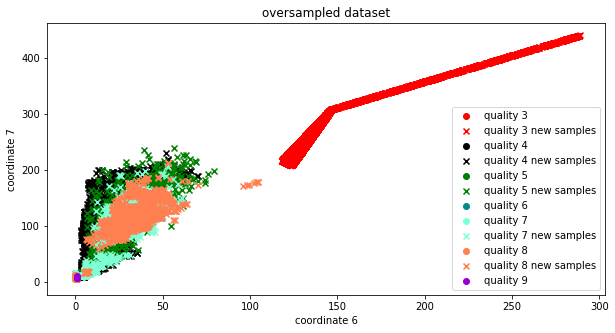

In [101]:
##由圖像看經過ovarsample後各類分布狀況
plt.figure(figsize=(10, 5))

for i in np.unique(y_wine_np):
    # plotting original sampels
    plt.scatter(x_wine_np[y_wine_np == i][:,0], 
                x_wine_np[y_wine_np == i][:,1], 
                label='quality %d' % i, 
                c=colors[i],
                marker='o')
    
    # plotting new samples
    if len(y_samp_wine[y_samp_wine == i]):
        plt.scatter(X_samp_wine[y_samp_wine == i][:, 6], 
                    X_samp_wine[y_samp_wine == i][:, 7], 
                    label='quality %d new samples' % i, 
                    c=colors[i], 
                    marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 6')
plt.ylabel('coordinate 7')
plt.legend()

In [21]:
##把全部可以用在muticlass的方法找出，計算長度
oversamplers=sv.get_all_oversamplers_multiclass()
oversamplers

[smote_variants._smote_variants.SMOTE,
 smote_variants._smote_variants.Borderline_SMOTE1,
 smote_variants._smote_variants.Borderline_SMOTE2,
 smote_variants._smote_variants.LLE_SMOTE,
 smote_variants._smote_variants.distance_SMOTE,
 smote_variants._smote_variants.SMMO,
 smote_variants._smote_variants.polynom_fit_SMOTE,
 smote_variants._smote_variants.ADOMS,
 smote_variants._smote_variants.Safe_Level_SMOTE,
 smote_variants._smote_variants.MSMOTE,
 smote_variants._smote_variants.SMOBD,
 smote_variants._smote_variants.TRIM_SMOTE,
 smote_variants._smote_variants.SMOTE_RSB,
 smote_variants._smote_variants.ProWSyn,
 smote_variants._smote_variants.SL_graph_SMOTE,
 smote_variants._smote_variants.NRSBoundary_SMOTE,
 smote_variants._smote_variants.LVQ_SMOTE,
 smote_variants._smote_variants.SOI_CJ,
 smote_variants._smote_variants.ROSE,
 smote_variants._smote_variants.SMOTE_OUT,
 smote_variants._smote_variants.SMOTE_Cosine,
 smote_variants._smote_variants.Selected_SMOTE,
 smote_variants._smote_var

2019-08-20 14:36:22,786:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:22,788:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:22,789:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:22,804:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:22,805:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:22,816:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:22,818:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:22,828:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:22,830:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.237012987012987, 'n_neighbors

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


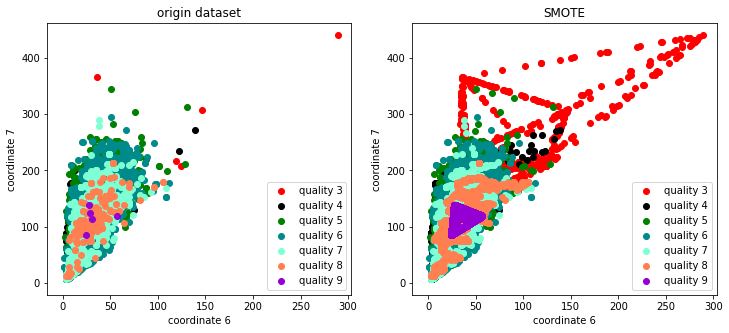

2019-08-20 14:36:23,723:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:23,725:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:23,726:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:23,822:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:23,823:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:23,878:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:23,879:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:23,903:INFO:MulticlassOversampling: Sampling minority class wi

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


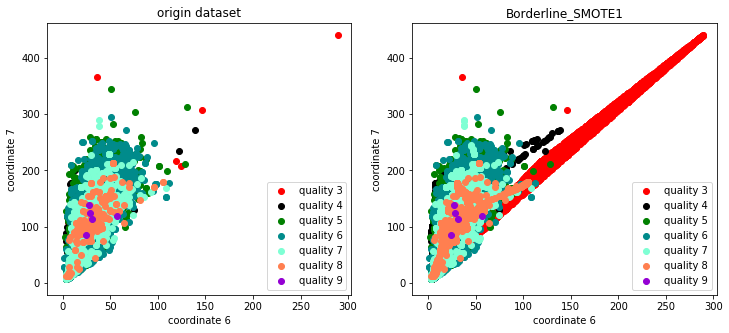

2019-08-20 14:36:24,736:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:24,737:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:24,738:INFO:Borderline_SMOTE2: Running sampling via ('Borderline_SMOTE2', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:24,836:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:24,837:INFO:Borderline_SMOTE2: Running sampling via ('Borderline_SMOTE2', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:24,900:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:24,901:INFO:Borderline_SMOTE2: Running sampling via ('Borderline_SMOTE2', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:24,930:INFO:MulticlassOversampling: Sampling minority class wi

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


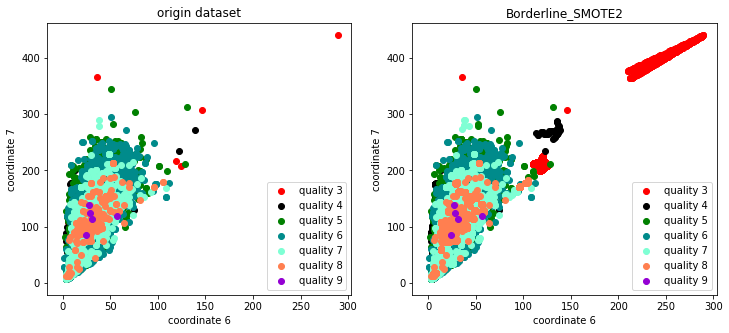

2019-08-20 14:36:25,825:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:25,826:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:25,827:INFO:LLE_SMOTE: Running sampling via ('LLE_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_components': 2, 'n_jobs': 1}")
2019-08-20 14:36:26,283:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:26,284:INFO:LLE_SMOTE: Running sampling via ('LLE_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_components': 2, 'n_jobs': 1}")
2019-08-20 14:36:26,574:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:26,575:INFO:LLE_SMOTE: Running sampling via ('LLE_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_components': 2, 'n_jobs': 1}")
2019-08-20 14:36:26,760:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:26,763:INFO:LLE_

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


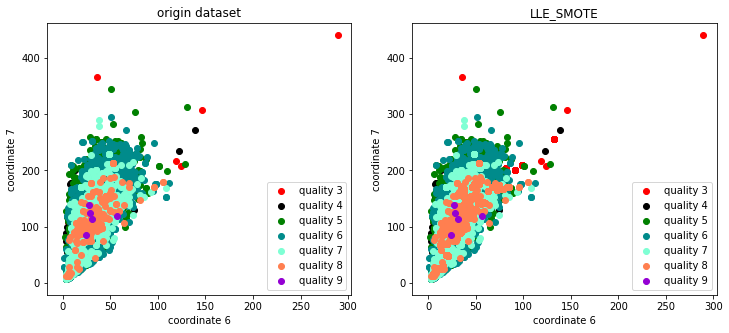

2019-08-20 14:36:27,970:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:27,971:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:27,972:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:27,998:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:27,999:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:28,041:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:28,042:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:28,100:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:28,102:INFO:distance_SMOTE: Running samplin

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


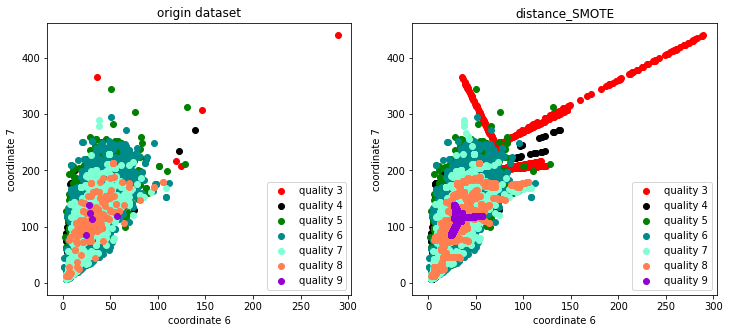

2019-08-20 14:36:29,174:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:29,175:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:29,176:INFO:SMMO: Running sampling via ('SMMO', "{'proportion': 1.0, 'n_neighbors': 5, 'ensemble': [QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,\n               store_covariance=False, store_covariances=None, tol=0.0001), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best'), GaussianNB(priors=None, var_smoothing=1e-09)], 'n_jobs': 1}")
2019-08-20 14:36:29,232:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:29

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


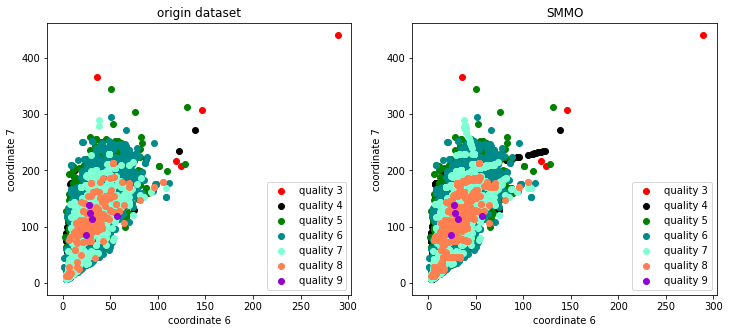

2019-08-20 14:36:30,735:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:30,736:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:30,737:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star'}")
2019-08-20 14:36:30,747:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:30,748:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.3823915900131406, 'topology': 'star'}")
2019-08-20 14:36:30,757:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:30,758:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.3160320155226777, 'topology': 'star'}")
2019-08-20 14:36:30,770:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:30,772:INFO:polynom_fit_SMOTE: Running sampling via ('poly

	quality 3 - samples: 30   			quality 3 - samples: 3420
	quality 4 - samples: 214   			quality 4 - samples: 3424
	quality 5 - samples: 2128   			quality 5 - samples: 4256
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 3222
	quality 8 - samples: 192   			quality 8 - samples: 3456
	quality 9 - samples: 5   			quality 9 - samples: 3430


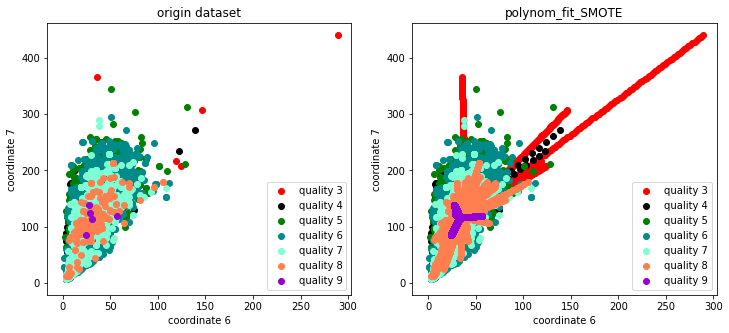

2019-08-20 14:36:31,727:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:31,728:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:31,729:INFO:ADOMS: Running sampling via ('ADOMS', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:31,884:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:31,885:INFO:ADOMS: Running sampling via ('ADOMS', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:32,253:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:32,254:INFO:ADOMS: Running sampling via ('ADOMS', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:32,811:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:32,813:INFO:ADOMS: Running sampling via ('ADOMS', "{'proportion': 0.237012987012987, 'n_neighbors

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


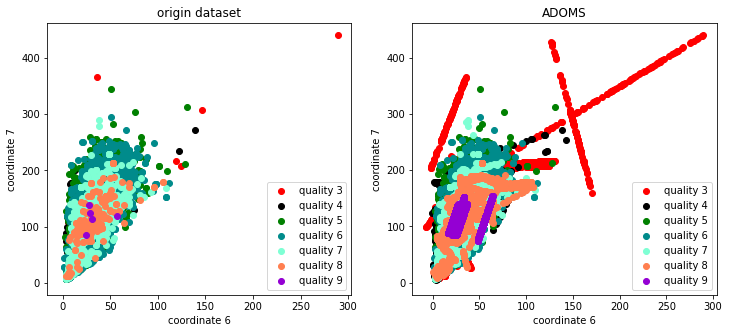

2019-08-20 14:36:35,806:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:35,807:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:35,809:INFO:Safe_Level_SMOTE: Running sampling via ('Safe_Level_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:35,879:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:35,880:INFO:Safe_Level_SMOTE: Running sampling via ('Safe_Level_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:35,976:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:35,977:INFO:Safe_Level_SMOTE: Running sampling via ('Safe_Level_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:36,078:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:36,080:INFO:Safe_Level_SMOTE: R

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 383
	quality 5 - samples: 2128   			quality 5 - samples: 2717
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 1748
	quality 8 - samples: 192   			quality 8 - samples: 301
	quality 9 - samples: 5   			quality 9 - samples: 5


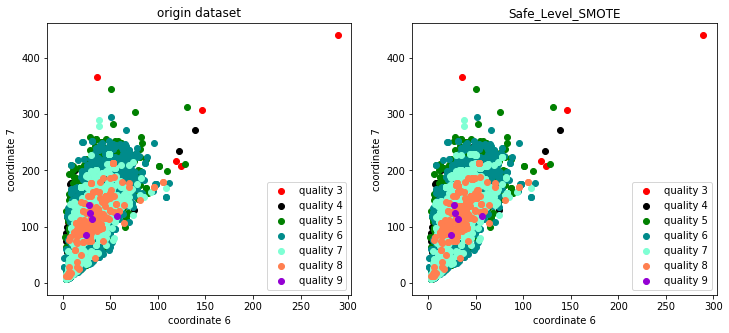

2019-08-20 14:36:36,925:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:36,926:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:36,927:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:36,954:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:36,955:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:36,996:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:36,998:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:37,093:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:36:37,095:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.237012987012987, 'n_n

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


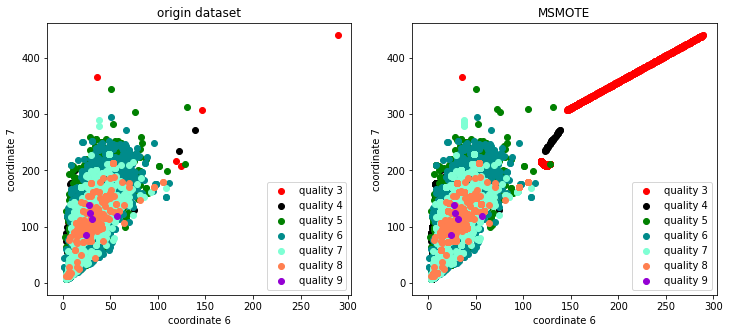

2019-08-20 14:36:38,217:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:38,218:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:38,220:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1}")
2019-08-20 14:36:38,308:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:38,309:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 0.3823915900131406, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1}")
2019-08-20 14:36:38,412:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:38,414:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 0.3160320155226777, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'max_eps': 1.0, 'n_jobs': 1}")
2019-08-20 14:36:38,503:INFO:MulticlassOversampling: Sampling minority class with label:

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


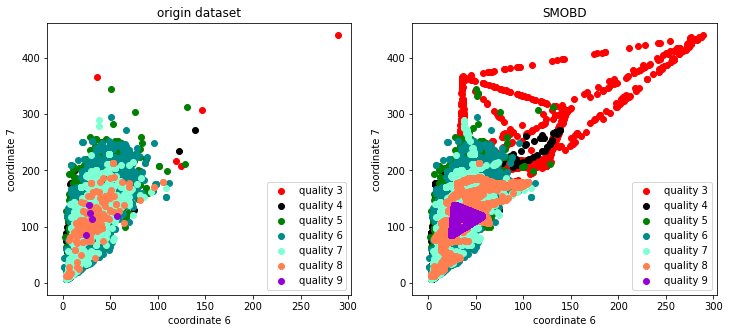

2019-08-20 14:36:39,660:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:39,661:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:39,663:INFO:TRIM_SMOTE: Running sampling via ('TRIM_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'min_precision': 0.3, 'n_jobs': 1}")
2019-08-20 14:36:39,664:INFO:TRIM_SMOTE: do the trimming process
2019-08-20 14:36:40,983:INFO:TRIM_SMOTE: do the sampling
2019-08-20 14:36:40,994:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:40,995:INFO:TRIM_SMOTE: Running sampling via ('TRIM_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'min_precision': 0.3, 'n_jobs': 1}")
2019-08-20 14:36:40,996:INFO:TRIM_SMOTE: do the trimming process
2019-08-20 14:36:43,056:INFO:TRIM_SMOTE: do the sampling
2019-08-20 14:36:43,078:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:43,079:INFO:TRIM

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


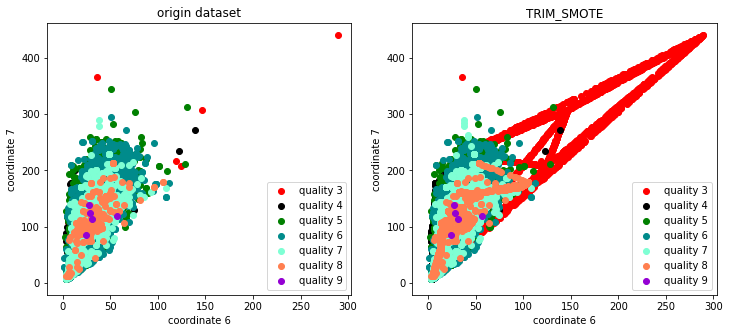

2019-08-20 14:36:50,680:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:36:50,681:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:36:50,682:INFO:SMOTE_RSB: Running sampling via ('SMOTE_RSB', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:50,683:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:50,889:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:36:50,890:INFO:SMOTE_RSB: Running sampling via ('SMOTE_RSB', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:50,892:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:36:51,769:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:36:51,770:INFO:SMOTE_RSB: Running sampling via ('SMOTE

	quality 3 - samples: 30   			quality 3 - samples: 2180
	quality 4 - samples: 214   			quality 4 - samples: 215
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2202
	quality 9 - samples: 5   			quality 9 - samples: 604


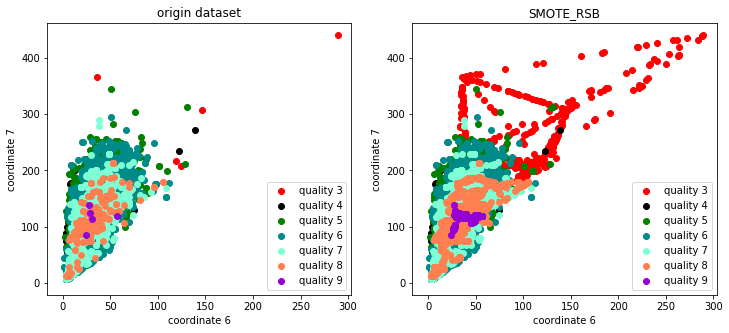

2019-08-20 14:37:00,431:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:37:00,432:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:37:00,434:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1}")
2019-08-20 14:37:00,544:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:37:00,546:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1}")
2019-08-20 14:37:00,810:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:37:00,811:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'L': 5, 'theta': 1.0, 'n_jobs': 1}")
2019-08-20 14:37:01,093:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:37:01,095:INFO:ProWSyn

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


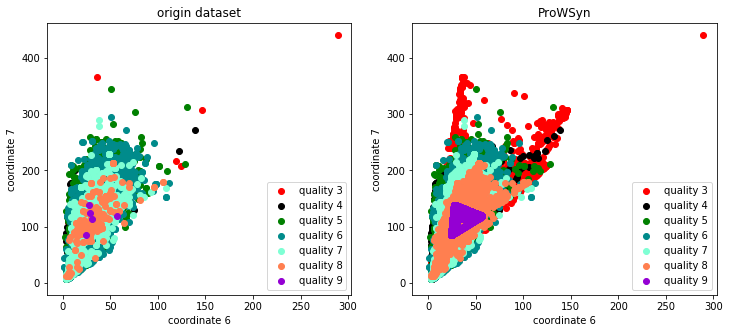

2019-08-20 14:37:02,994:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:37:02,996:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:37:02,997:INFO:SL_graph_SMOTE: Running sampling via ('SL_graph_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:37:03,027:INFO:Safe_Level_SMOTE: Running sampling via ('Safe_Level_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:37:03,094:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:37:03,095:INFO:SL_graph_SMOTE: Running sampling via ('SL_graph_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:37:03,114:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:37:03,170:INFO:MulticlassOversampling: Sampling minority clas

	quality 3 - samples: 30   			quality 3 - samples: 2768
	quality 4 - samples: 214   			quality 4 - samples: 2770
	quality 5 - samples: 2128   			quality 5 - samples: 2706
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2776
	quality 8 - samples: 192   			quality 8 - samples: 2770
	quality 9 - samples: 5   			quality 9 - samples: 5


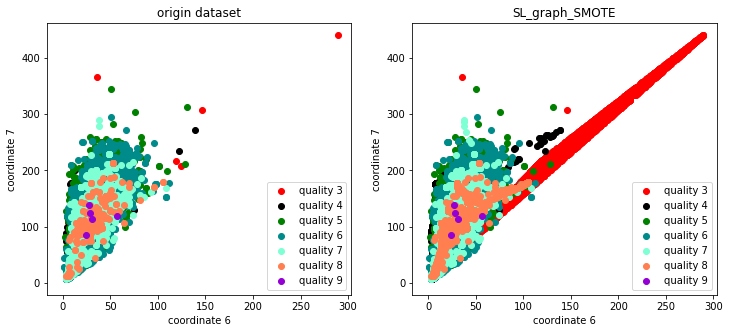

2019-08-20 14:37:04,135:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:37:04,136:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:37:04,137:INFO:NRSBoundary_SMOTE: Running sampling via ('NRSBoundary_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'w': 0.005, 'n_jobs': 1}")
2019-08-20 14:37:05,904:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:37:05,904:INFO:NRSBoundary_SMOTE: Running sampling via ('NRSBoundary_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'w': 0.005, 'n_jobs': 1}")
2019-08-20 14:37:09,209:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:37:09,210:INFO:NRSBoundary_SMOTE: Running sampling via ('NRSBoundary_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'w': 0.005, 'n_jobs': 1}")
2019-08-20 14:37:15,597:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-0

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


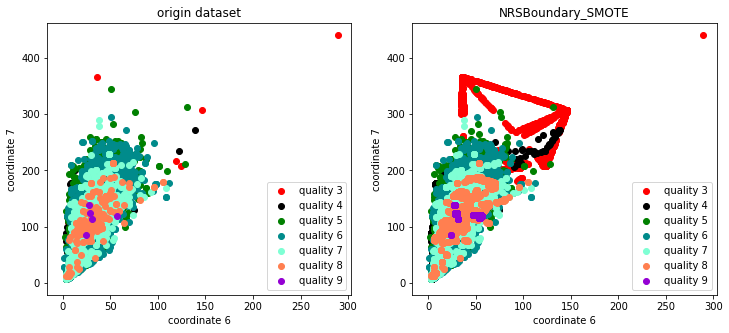

2019-08-20 14:39:51,099:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:39:51,101:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:39:51,102:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1}")
2019-08-20 14:39:51,579:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:39:51,580:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1}")
2019-08-20 14:39:52,490:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:39:52,491:INFO:LVQ_SMOTE: Running sampling via ('LVQ_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_clusters': 10, 'n_jobs': 1}")
2019-08-20 14:39:53,748:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:39:53,749:INFO:LVQ_SMO

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


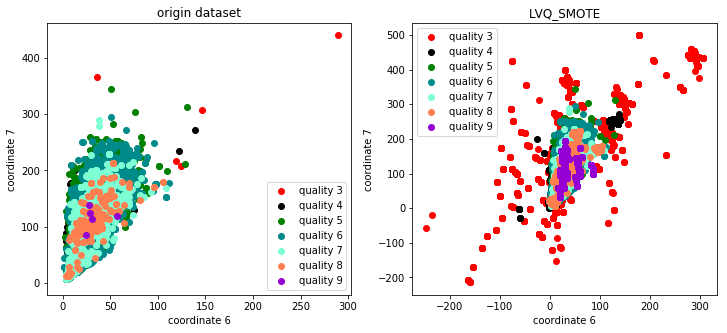

2019-08-20 14:39:57,496:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:39:57,497:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:39:57,498:INFO:SOI_CJ: Running sampling via ('SOI_CJ', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'interpolation', 'n_jobs': 1}")
2019-08-20 14:39:57,500:INFO:SOI_CJ: Executing clustering
2019-08-20 14:40:00,837:INFO:SOI_CJ: Executing sample generation
2019-08-20 14:40:00,910:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:00,911:INFO:SOI_CJ: Running sampling via ('SOI_CJ', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'method': 'interpolation', 'n_jobs': 1}")
2019-08-20 14:40:00,912:INFO:SOI_CJ: Executing clustering
2019-08-20 14:40:01,727:INFO:SOI_CJ: Executing sample generation
2019-08-20 14:40:01,897:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:40:01,898:INFO:SOI_CJ: 

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


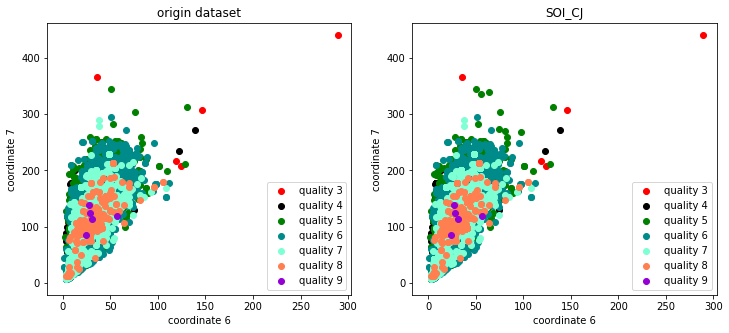

2019-08-20 14:40:03,257:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:40:03,258:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:40:03,259:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.0}")
2019-08-20 14:40:03,268:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:03,270:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.3823915900131406}")
2019-08-20 14:40:03,290:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:40:03,292:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.3160320155226777}")
2019-08-20 14:40:03,325:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:40:03,327:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.237012987012987}")
2019-08-20 14:40:03,356:INFO:MulticlassOversampling: Sampling minority class with label: 3
2019-08-20 14:40:03,

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


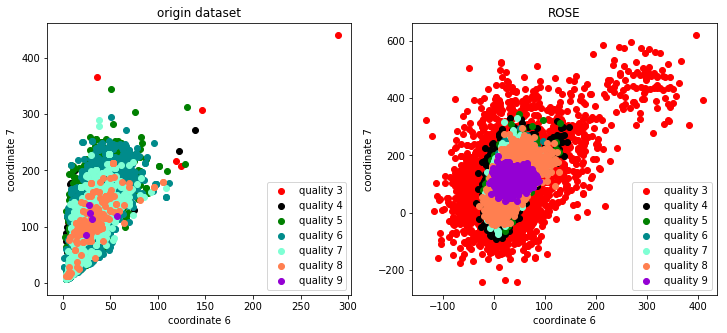

2019-08-20 14:40:04,257:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:40:04,258:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:40:04,260:INFO:SMOTE_OUT: Running sampling via ('SMOTE_OUT', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:04,300:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:04,301:INFO:SMOTE_OUT: Running sampling via ('SMOTE_OUT', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:04,349:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:40:04,351:INFO:SMOTE_OUT: Running sampling via ('SMOTE_OUT', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:04,402:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:40:04,403:INFO:SMOTE_OUT: Running sampling via ('SMOTE_OUT', "{'proportion':

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


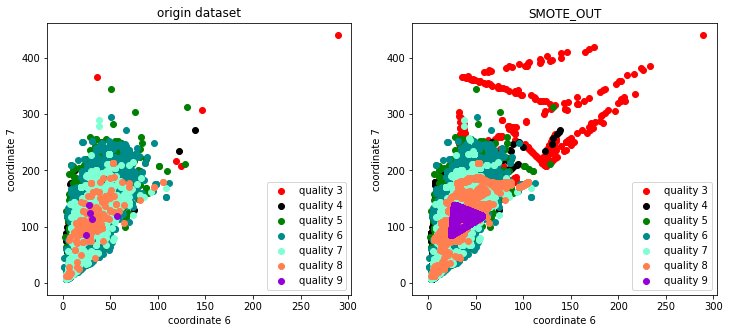

2019-08-20 14:40:05,491:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:40:05,493:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:40:05,495:INFO:SMOTE_Cosine: Running sampling via ('SMOTE_Cosine', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:09,409:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:09,410:INFO:SMOTE_Cosine: Running sampling via ('SMOTE_Cosine', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:12,881:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:40:12,883:INFO:SMOTE_Cosine: Running sampling via ('SMOTE_Cosine', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:13,676:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:40:13,677:INFO:SMOTE_Cosine: Running sampling via ('SMOTE_

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


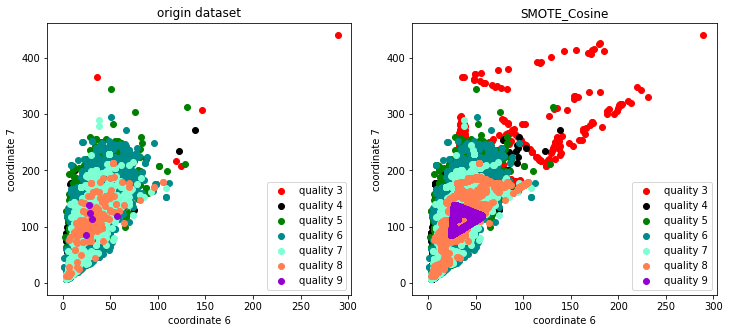

2019-08-20 14:40:15,600:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:40:15,601:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:40:15,602:INFO:Selected_SMOTE: Running sampling via ('Selected_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'perc_sign_attr': 0.5, 'n_jobs': 1}")
2019-08-20 14:40:15,761:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:15,763:INFO:Selected_SMOTE: Running sampling via ('Selected_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'perc_sign_attr': 0.5, 'n_jobs': 1}")
2019-08-20 14:40:15,960:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:40:15,961:INFO:Selected_SMOTE: Running sampling via ('Selected_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'perc_sign_attr': 0.5, 'n_jobs': 1}")
2019-08-20 14:40:16,045:INFO:MulticlassOversampling: Sampling minority class with 

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


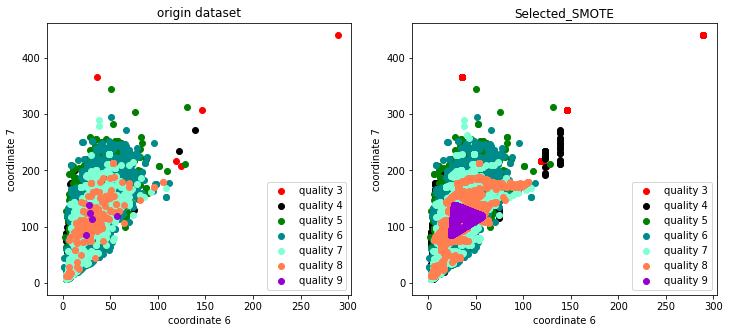

2019-08-20 14:40:17,188:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:40:17,189:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:40:17,191:INFO:LN_SMOTE: Running sampling via ('LN_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:17,269:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:17,270:INFO:LN_SMOTE: Running sampling via ('LN_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:17,454:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:40:17,455:INFO:LN_SMOTE: Running sampling via ('LN_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:40:17,526:INFO:LN_SMOTE: no instances with slp > 0 and sln > 0 found
2019-08-20 14:40:17,528:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 214
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2202
	quality 9 - samples: 5   			quality 9 - samples: 5


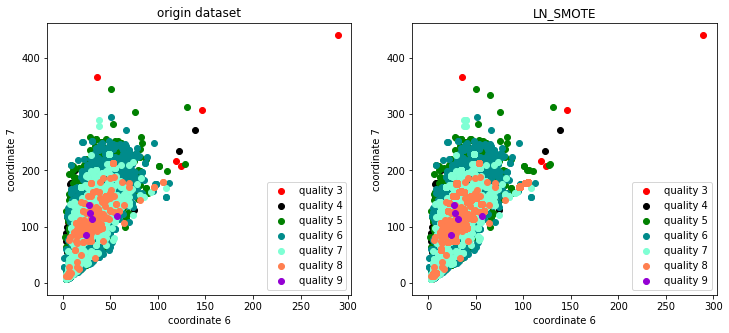

2019-08-20 14:40:18,716:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:40:18,718:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:40:18,719:INFO:MWMOTE: Running sampling via ('MWMOTE', "{'proportion': 1.0, 'k1': 5, 'k2': 5, 'k3': 5, 'M': 10, 'cf_th': 5.0, 'cmax': 10.0, 'n_jobs': 1}")
2019-08-20 14:40:18,798:INFO:MWMOTE: computing closeness factors
2019-08-20 14:40:48,772:INFO:MWMOTE: computing information weights
2019-08-20 14:40:51,857:INFO:MWMOTE: do clustering
2019-08-20 14:40:52,031:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:40:52,033:INFO:MWMOTE: Running sampling via ('MWMOTE', "{'proportion': 0.3823915900131406, 'k1': 5, 'k2': 5, 'k3': 5, 'M': 10, 'cf_th': 5.0, 'cmax': 10.0, 'n_jobs': 1}")
2019-08-20 14:40:52,113:INFO:MWMOTE: computing closeness factors
2019-08-20 14:41:04,567:INFO:MWMOTE: computing information weights
2019-08-20 14:41:05,8

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


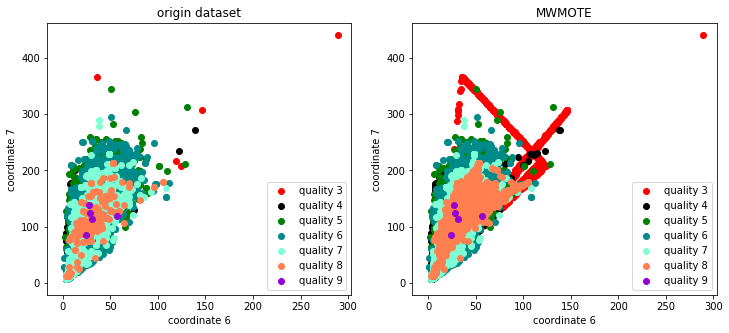

2019-08-20 14:41:08,301:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:41:08,302:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:41:08,303:INFO:PDFOS: Running sampling via ('PDFOS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-08-20 14:41:08,309:INFO:PDFOS: Condition number of covariance matrix: 220.490109
2019-08-20 14:41:08,310:INFO:PDFOS: Input size: 2128
2019-08-20 14:41:08,310:INFO:PDFOS: Input dim: 12
2019-08-20 14:41:08,311:INFO:PDFOS: Matrix rank of covariance matrix: 12
2019-08-20 14:41:08,311:INFO:PDFOS: Determinant: 0.000327
2019-08-20 14:41:11,548:INFO:PDFOS: best sigma found: 0.615848
2019-08-20 14:41:11,670:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:41:11,672:INFO:PDFOS: Running sampling via ('PDFOS', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
2019-08-20 14:41:11,677:INFO:PDFOS: Condition number of covariance matrix: 206.736155

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


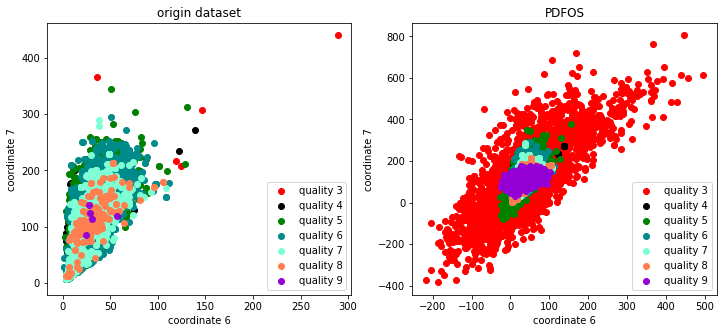

2019-08-20 14:41:24,806:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:41:24,807:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:41:24,809:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.0, 'n_jobs': 1}")
2019-08-20 14:41:24,886:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:41:24,887:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
2019-08-20 14:41:25,090:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:41:25,091:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.3160320155226777, 'n_jobs': 1}")
2019-08-20 14:41:25,429:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:41:25,430:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.237012987012987, 'n_jobs': 

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


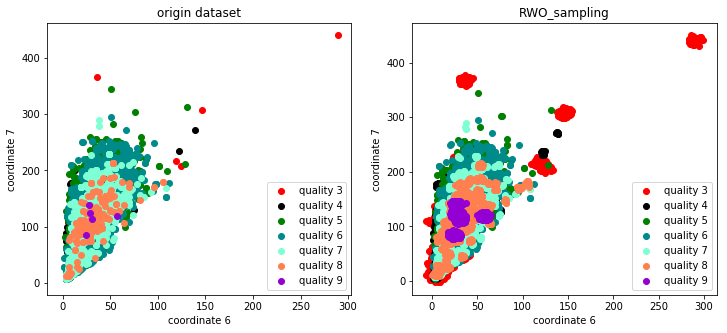

2019-08-20 14:41:27,257:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:41:27,258:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:41:27,259:INFO:DEAGO: Running sampling via ('DEAGO', "{'proportion': 1.0, 'n_neighbors': 5, 'e': 100, 'h': 0.3, 'sigma': 0.1, 'n_jobs': 1}")
2019-08-20 14:41:27,260:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:41:27,276:INFO:DEAGO: Input dimension: 12, encoding dimension: 4
2019-08-20 14:41:31,476:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:41:31,478:INFO:DEAGO: Running sampling via ('DEAGO', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'e': 100, 'h': 0.3, 'sigma': 0.1, 'n_jobs': 1}")
2019-08-20 14:41:31,478:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 14:41:31,492:INFO

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


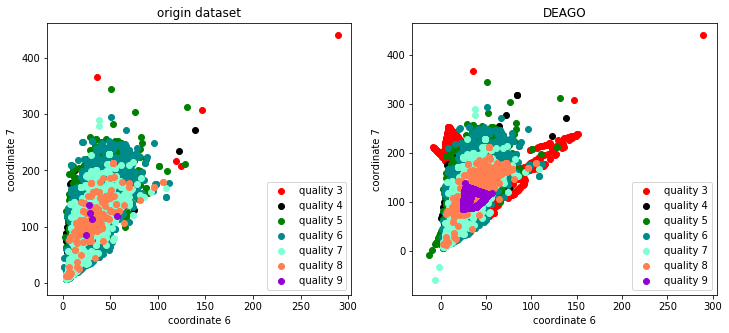

2019-08-20 14:41:41,304:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:41:41,306:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:41:41,307:INFO:MCT: Running sampling via ('MCT', "{'proportion': 1.0, 'n_jobs': 1}")
2019-08-20 14:41:41,351:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:41:41,353:INFO:MCT: Running sampling via ('MCT', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
2019-08-20 14:41:41,422:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:41:41,424:INFO:MCT: Running sampling via ('MCT', "{'proportion': 0.3160320155226777, 'n_jobs': 1}")
2019-08-20 14:41:41,501:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 14:41:41,502:INFO:MCT: Running sampling via ('MCT', "{'proportion': 0.237012987012987, 'n_jobs': 1}")
2019-08-20 14:41:41,573:INFO:MulticlassOversampling: Sampling minor

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


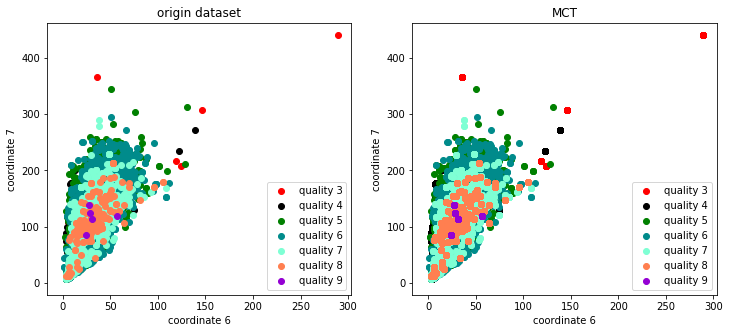

2019-08-20 14:41:42,709:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:41:42,710:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:41:42,711:INFO:ADG: Running sampling via ('ADG', "{'proportion': 1.0, 'kernel': 'inner', 'lam': 1.0, 'mu': 1.0, 'k': 12, 'gamma': 1.0, 'n_jobs': 1}")
2019-08-20 14:42:01,439:INFO:ADG: Starting iteration with q=692
2019-08-20 14:42:04,026:WARNING:ADG: Singular matrix
2019-08-20 14:42:04,056:WARNING:ADG: reducing dimensionality to 3
2019-08-20 14:42:04,059:INFO:ADG: Running sampling via ('ADG', "{'proportion': 1.0, 'kernel': 'inner', 'lam': 1.0, 'mu': 1.0, 'k': 12, 'gamma': 1.0, 'n_jobs': 1}")
2019-08-20 14:42:22,868:INFO:ADG: Starting iteration with q=692
2019-08-20 14:42:25,444:WARNING:ADG: Singular matrix
2019-08-20 14:42:25,465:WARNING:ADG: reducing dimensionality to 1
2019-08-20 14:42:25,466:INFO:ADG: Running sampling via ('ADG', "{'proportion': 1.0, 'k

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 214
	quality 5 - samples: 2128   			quality 5 - samples: 2128
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 1074
	quality 8 - samples: 192   			quality 8 - samples: 192
	quality 9 - samples: 5   			quality 9 - samples: 5


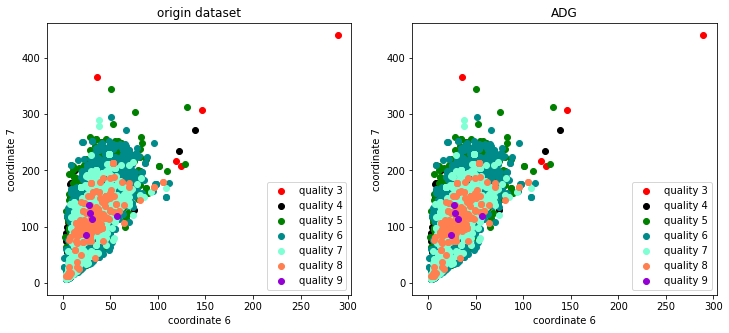

2019-08-20 14:52:08,774:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:52:08,777:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:52:08,784:INFO:KernelADASYN: Running sampling via ('KernelADASYN', "{'proportion': 1.0, 'k': 5, 'h': 1.0, 'n_jobs': 1}")
2019-08-20 14:52:09,044:INFO:KernelADASYN: reducing dimensions due to inproperly conditioned covariance matrix
2019-08-20 14:52:09,205:INFO:KernelADASYN: Running sampling via ('KernelADASYN', "{'proportion': 1.0, 'k': 5, 'h': 1.0, 'n_jobs': 1}")
2019-08-20 14:52:09,300:INFO:KernelADASYN: reducing dimensions due to inproperly conditioned covariance matrix
2019-08-20 14:52:09,366:INFO:KernelADASYN: Running sampling via ('KernelADASYN', "{'proportion': 1.0, 'k': 5, 'h': 1.0, 'n_jobs': 1}")
2019-08-20 14:52:15,383:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:52:15,386:INFO:KernelADASYN: Running sampling vi

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


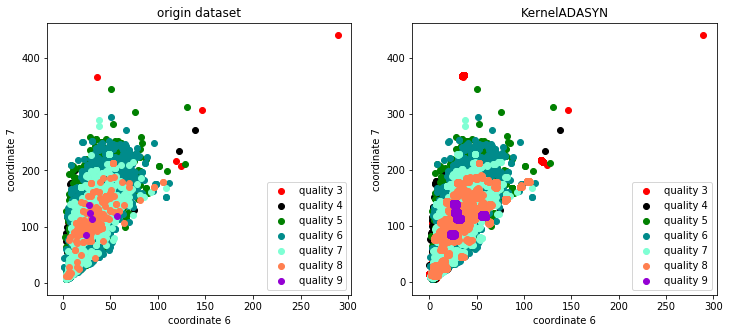

2019-08-20 14:52:42,912:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 14:52:42,914:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 14:52:42,916:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1}")
2019-08-20 14:52:42,917:INFO:MOT2LD: starting TSNE
2019-08-20 14:53:23,407:INFO:MOT2LD: TSNE finished
2019-08-20 14:53:26,170:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 14:53:26,172:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 0.3823915900131406, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1}")
2019-08-20 14:53:26,176:INFO:MOT2LD: starting TSNE
2019-08-20 14:54:15,353:INFO:MOT2LD: TSNE finished
2019-08-20 14:54:16,356:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 14:54:16,357:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportio

	quality 3 - samples: 30   			quality 3 - samples: 2796
	quality 4 - samples: 214   			quality 4 - samples: 2668
	quality 5 - samples: 2128   			quality 5 - samples: 2679
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2622
	quality 8 - samples: 192   			quality 8 - samples: 2716
	quality 9 - samples: 5   			quality 9 - samples: 5


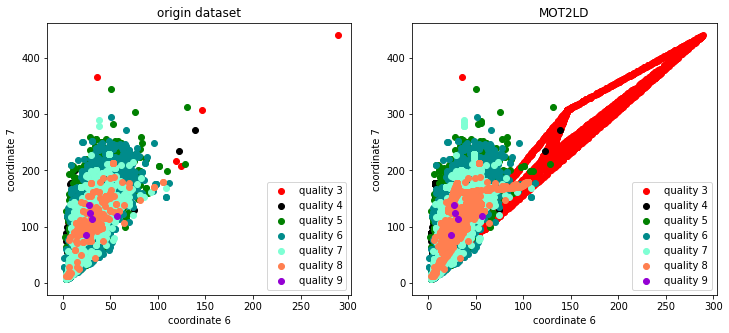

2019-08-20 15:01:34,794:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:01:34,796:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:01:34,799:INFO:V_SYNTH: Running sampling via ('V_SYNTH', "{'proportion': 1.0, 'n_components': 3, 'n_jobs': 1}")
2019-08-20 15:01:39,048:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:01:39,050:INFO:V_SYNTH: Running sampling via ('V_SYNTH', "{'proportion': 0.3823915900131406, 'n_components': 3, 'n_jobs': 1}")
2019-08-20 15:01:45,812:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:01:45,813:INFO:V_SYNTH: Running sampling via ('V_SYNTH', "{'proportion': 0.3160320155226777, 'n_components': 3, 'n_jobs': 1}")
2019-08-20 15:01:53,234:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:01:53,236:INFO:V_SYNTH: Running sampling via ('V_SYNTH', "{'proportion': 0.2370129870

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 214
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 1074
	quality 8 - samples: 192   			quality 8 - samples: 192
	quality 9 - samples: 5   			quality 9 - samples: 5


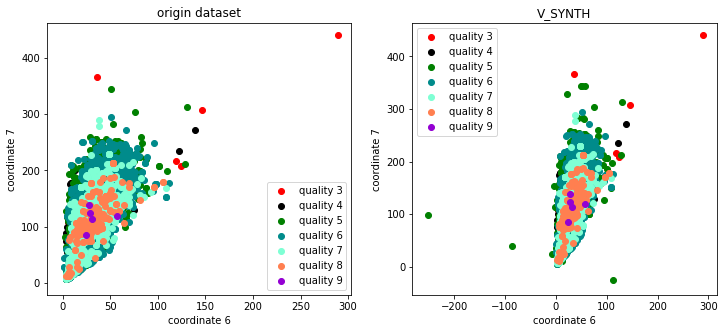

2019-08-20 15:02:17,838:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:02:17,840:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:02:17,841:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 1.0, 'n_jobs': 1}")
D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
2019-08-20 15:02:18,025:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:02:18,026:INFO:OUPS: Running sampling via ('OUPS', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
2019-08-20 15:02:18,134:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08

	quality 3 - samples: 30   			quality 3 - samples: 2854
	quality 4 - samples: 214   			quality 4 - samples: 2823
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2825
	quality 8 - samples: 192   			quality 8 - samples: 2838
	quality 9 - samples: 5   			quality 9 - samples: 3401


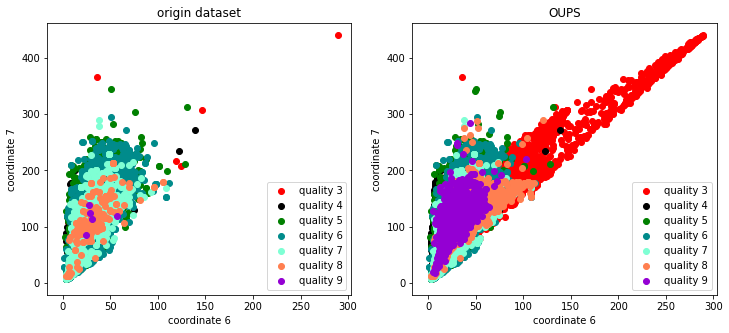

2019-08-20 15:02:19,702:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:02:19,703:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:02:19,704:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1}")
D:\Python\lib\site-packages\smote_variants\_smote_variants.py:8412: RuntimeWarning: invalid value encountered in true_divide
  p_ij= dist[:,1:]/np.sum(dist[:,1:], axis= 1)[:,None]
2019-08-20 15:02:19,741:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:02:19,742:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 0.3823915900131406, 'k': 3, 'n_jobs': 1}")
D:\Python\lib\site-packages\smote_variants\_smote_variants.py:8412: RuntimeWarning: invalid value encountered in true_divide
  p_ij= dist[:,1:]/np.sum(dist[:,1:], axis= 1)[:,None]
2019-08-20 15:02:19,774:INFO:MulticlassOversampling: Sampling minority class with la

	quality 3 - samples: 30   			quality 3 - samples: 2813
	quality 4 - samples: 214   			quality 4 - samples: 2803
	quality 5 - samples: 2128   			quality 5 - samples: 2795
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2826
	quality 8 - samples: 192   			quality 8 - samples: 2816
	quality 9 - samples: 5   			quality 9 - samples: 2813


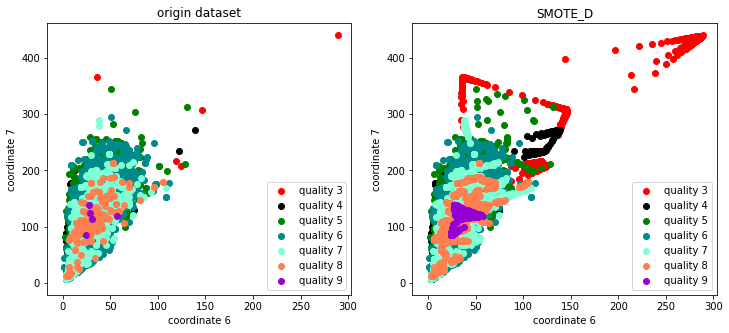

2019-08-20 15:02:20,779:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:02:20,780:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:02:20,781:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1}")
2019-08-20 15:02:58,038:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:02:58,039:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 0.3823915900131406, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1}")
2019-08-20 15:03:02,859:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:03:02,860:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 0.3160320155226777, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1}")
2019-08-20 15:03:02,959:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:03:02,960:INFO:CURE_SMOTE: R

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


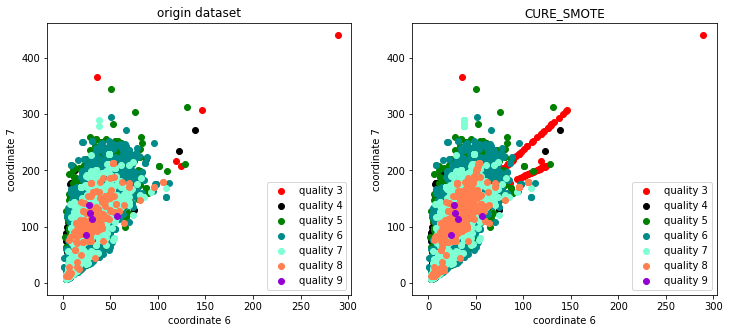

2019-08-20 15:03:03,961:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:03:03,962:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:03:03,966:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1}")
2019-08-20 15:03:04,915:WARNING:SOMO: all clusters filtered
2019-08-20 15:03:04,917:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:03:04,918:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 0.3823915900131406, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1}")
2019-08-20 15:03:06,055:WARNING:SOMO: all clusters filtered
2019-08-20 15:03:06,057:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:03:06,059:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 0.3160320155226777, 'n_grid': 10, 'sigma': 0.2, 'l

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 214
	quality 5 - samples: 2128   			quality 5 - samples: 2128
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 1074
	quality 8 - samples: 192   			quality 8 - samples: 192
	quality 9 - samples: 5   			quality 9 - samples: 5


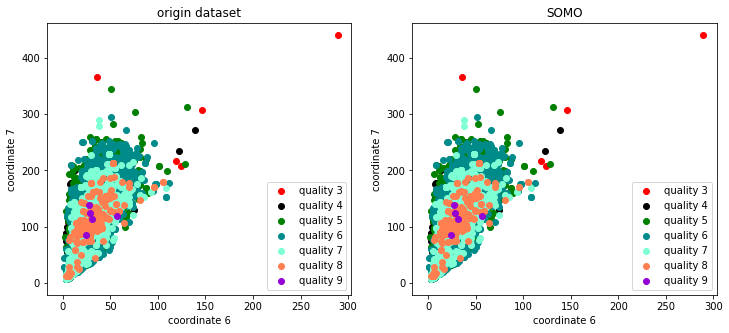

2019-08-20 15:03:11,073:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:03:11,075:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:03:11,078:INFO:CE_SMOTE: Running sampling via ('CE_SMOTE', "{'proportion': 1.0, 'h': 10, 'k': 5, 'alpha': 0.5, 'n_jobs': 1}")
2019-08-20 15:03:12,613:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:03:12,615:INFO:CE_SMOTE: Running sampling via ('CE_SMOTE', "{'proportion': 0.3823915900131406, 'h': 10, 'k': 5, 'alpha': 0.5, 'n_jobs': 1}")
2019-08-20 15:03:14,269:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:03:14,273:INFO:CE_SMOTE: Running sampling via ('CE_SMOTE', "{'proportion': 0.3160320155226777, 'h': 10, 'k': 5, 'alpha': 0.5, 'n_jobs': 1}")
2019-08-20 15:03:16,350:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:03:16,352:INFO:CE_SMOTE: Running sampling v

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


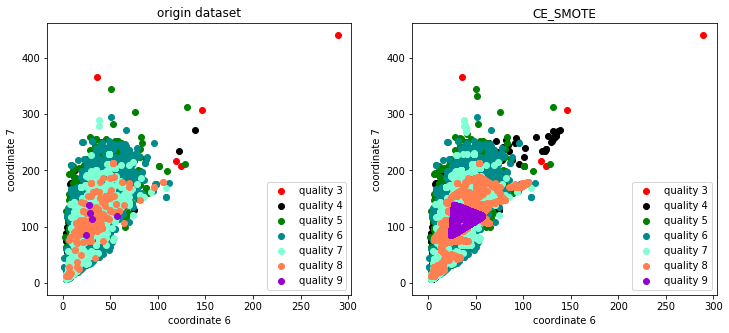

2019-08-20 15:03:28,904:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:03:28,905:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:03:28,907:INFO:Edge_Det_SMOTE: Running sampling via ('Edge_Det_SMOTE', "{'proportion': 1.0, 'k': 5, 'n_jobs': 1}")
2019-08-20 15:03:29,062:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:03:29,063:INFO:Edge_Det_SMOTE: Running sampling via ('Edge_Det_SMOTE', "{'proportion': 0.3823915900131406, 'k': 5, 'n_jobs': 1}")
2019-08-20 15:03:29,277:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:03:29,278:INFO:Edge_Det_SMOTE: Running sampling via ('Edge_Det_SMOTE', "{'proportion': 0.3160320155226777, 'k': 5, 'n_jobs': 1}")
2019-08-20 15:03:29,572:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:03:29,573:INFO:Edge_Det_SMOTE: Running sampling via ('Edge_Det_SMOTE', "{'pr

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


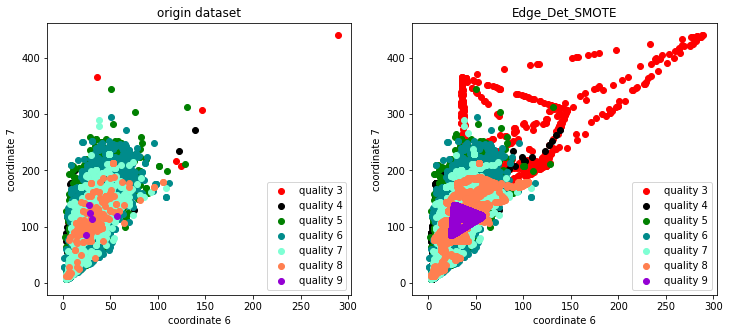

2019-08-20 15:03:31,970:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:03:31,971:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:03:31,972:INFO:CBSO: Running sampling via ('CBSO', "{'proportion': 1.0, 'n_neighbors': 5, 'C_p': 1.3, 'n_jobs': 1}")
2019-08-20 15:04:06,782:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:04:06,783:INFO:CBSO: Running sampling via ('CBSO', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'C_p': 1.3, 'n_jobs': 1}")
2019-08-20 15:04:11,641:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:04:11,642:INFO:CBSO: Running sampling via ('CBSO', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'C_p': 1.3, 'n_jobs': 1}")
2019-08-20 15:04:11,773:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:04:11,775:INFO:CBSO: Running sampling via ('CBSO', "{'proportion': 0.2

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


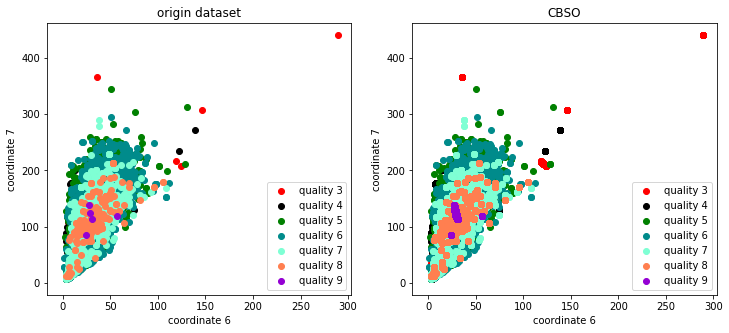

2019-08-20 15:04:13,129:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:04:13,130:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:04:13,131:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1}")
2019-08-20 15:04:13,472:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:04:13,474:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 0.3823915900131406, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1}")
2019-08-20 15:04:13,637:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:04:13,639:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 0.3160320155226777, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1}")
2019-08-20 15:04:13,645:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2019-08-20 15:04:13,646:INFO:DBSMOTE: Running 

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


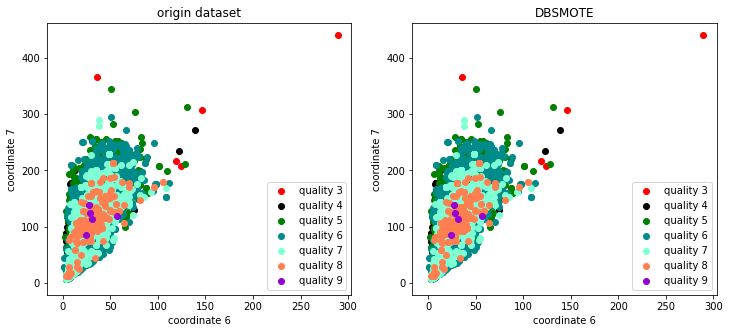

2019-08-20 15:04:14,710:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:04:14,712:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:04:14,713:INFO:ASMOBD: Running sampling via ('ASMOBD', "{'proportion': 1.0, 'min_samples': 3, 'eps': 0.8, 'eta': 0.5, 'T_1': 1.0, 'T_2': 1.0, 't_1': 4.0, 't_2': 4.0, 'a': 0.05, 'smoothing': 'linear', 'n_jobs': 1}")
2019-08-20 15:04:15,776:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:04:15,777:INFO:ASMOBD: Running sampling via ('ASMOBD', "{'proportion': 0.3823915900131406, 'min_samples': 3, 'eps': 0.8, 'eta': 0.5, 'T_1': 1.0, 'T_2': 1.0, 't_1': 4.0, 't_2': 4.0, 'a': 0.05, 'smoothing': 'linear', 'n_jobs': 1}")
2019-08-20 15:04:16,468:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:04:16,469:INFO:ASMOBD: Running sampling via ('ASMOBD', "{'proportion': 0.3160320155226777, 'min_samples': 3, 'e

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


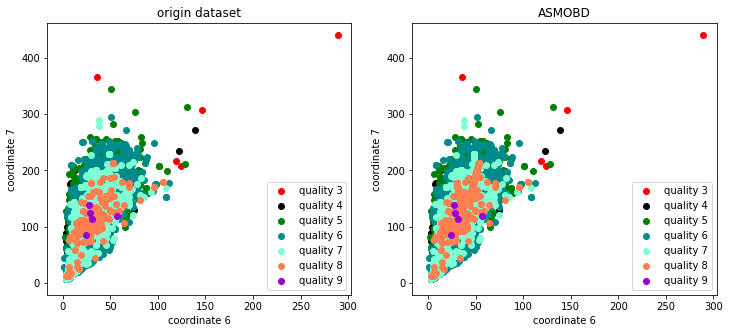

2019-08-20 15:04:18,068:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:04:18,070:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:04:18,070:INFO:Assembled_SMOTE: Running sampling via ('Assembled_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'pop': 2, 'thres': 0.3, 'n_jobs': 1}")
D:\Python\lib\site-packages\sklearn\decomposition\pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Python\lib\site-packages\sklearn\decomposition\pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Python\lib\site-packages\sklearn\decomposition\pca.py:446: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
D:\Python\lib\site-packages\sklearn\decomposition\pca.py:446: RuntimeWar

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


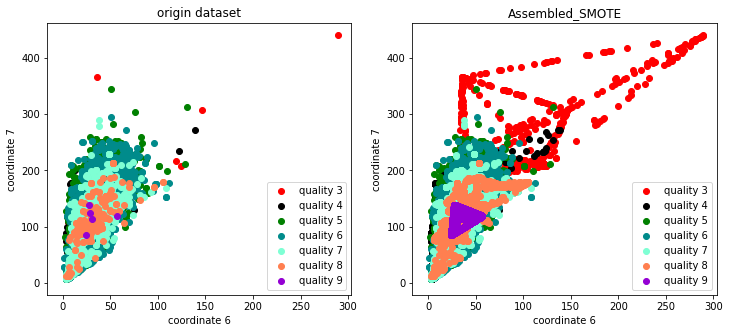

2019-08-20 15:04:59,869:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:04:59,870:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:04:59,870:INFO:SDSMOTE: Running sampling via ('SDSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:05:01,187:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:05:01,188:INFO:SDSMOTE: Running sampling via ('SDSMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:05:02,444:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:05:02,447:INFO:SDSMOTE: Running sampling via ('SDSMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:05:02,879:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:05:02,881:INFO:SDSMOTE: Running sampling via ('SDSMOTE', "{'proportion': 0.2370129870129

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


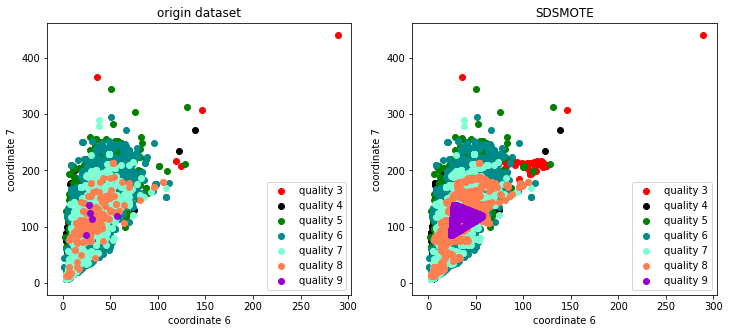

2019-08-20 15:05:04,692:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:05:04,694:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:05:04,695:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1}")
D:\Python\lib\site-packages\smote_variants\_smote_variants.py:10900: RuntimeWarning: invalid value encountered in double_scalars
  thetas= np.array([np.arccos(np.abs(np.dot(P[n], H_l))/(np.linalg.norm(P[n])*np.linalg.norm(H_l))) for n in range(len(P))])
2019-08-20 15:05:04,787:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:05:04,789:INFO:G_SMOTE: Running sampling via ('G_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'method': 'linear', 'n_jobs': 1}")
D:\Python\lib\site-packages\smote_variants\_smote_variants.py:10900: RuntimeWarning: invalid value encountered in double_scalars
 

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


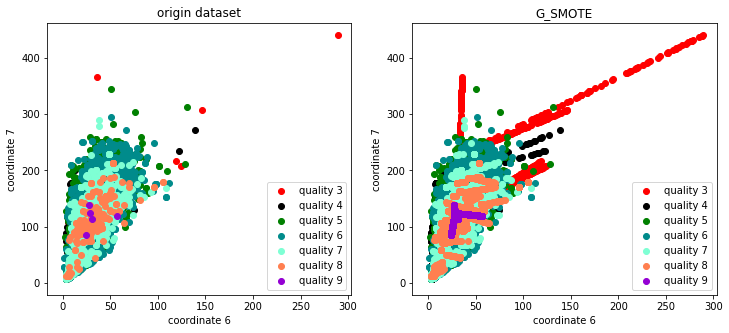

2019-08-20 15:05:06,787:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:05:06,788:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:05:06,790:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1}")
2019-08-20 15:05:06,807:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:05:06,808:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
2019-08-20 15:05:06,827:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:05:06,828:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 0.3160320155226777, 'n_jobs': 1}")
2019-08-20 15:05:06,855:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:05:06,857:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 0.237012987012987, 'n_jobs': 1}")
2019-08-20 15:05:06,880:INF

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


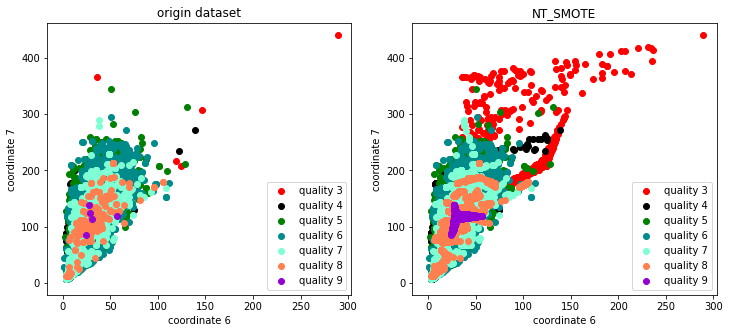

2019-08-20 15:05:07,804:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:05:07,805:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:05:07,806:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1}")
2019-08-20 15:05:08,022:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:05:08,023:INFO:Lee: Running sampling via ('Lee', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1}")
2019-08-20 15:05:08,523:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:05:08,524:INFO:Lee: Running sampling via ('Lee', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'rejection_level': 0.5, 'n_jobs': 1}")
2019-08-20 15:05:09,248:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:05:09,250:INFO:Lee: Running sampling via

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


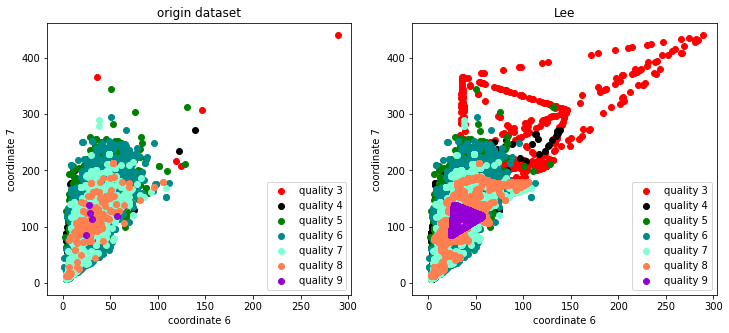

2019-08-20 15:05:12,372:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:05:12,374:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:05:12,374:INFO:MDO: Running sampling via ('MDO', "{'proportion': 1.0, 'K2': 5, 'K1_frac': 0.5, 'n_jobs': 1}")
2019-08-20 15:05:12,464:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:05:12,465:INFO:MDO: Running sampling via ('MDO', "{'proportion': 0.3823915900131406, 'K2': 5, 'K1_frac': 0.5, 'n_jobs': 1}")
2019-08-20 15:05:12,612:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:05:12,614:INFO:MDO: Running sampling via ('MDO', "{'proportion': 0.3160320155226777, 'K2': 5, 'K1_frac': 0.5, 'n_jobs': 1}")
2019-08-20 15:05:12,807:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:05:12,808:INFO:MDO: Running sampling via ('MDO', "{'proportion': 0.237012987012987, 'K2': 5

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


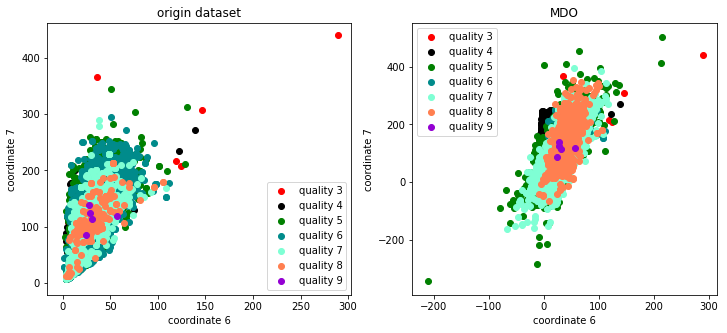

2019-08-20 15:05:13,713:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:05:13,714:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:05:13,715:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:05:13,749:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:05:13,751:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:05:13,811:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:05:13,813:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:05:13,885:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:05:13,887:INFO:Random_SMOTE: Running sampling via ('Random

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


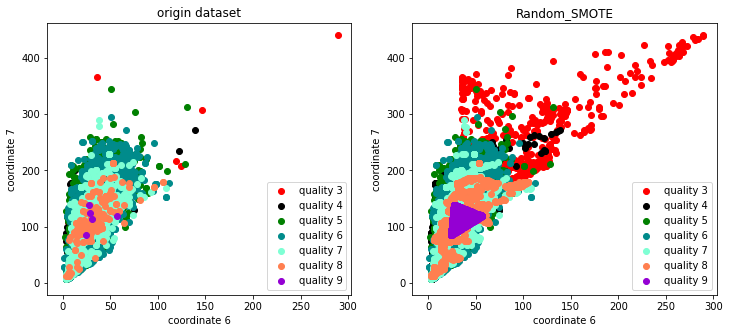

2019-08-20 15:05:15,056:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:05:15,057:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:05:15,058:INFO:A_SUWO: Running sampling via ('A_SUWO', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clus_maj': 7, 'c_thres': 0.8, 'n_jobs': 1}")
2019-08-20 15:11:16,201:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:11:16,203:INFO:A_SUWO: Running sampling via ('A_SUWO', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_clus_maj': 7, 'c_thres': 0.8, 'n_jobs': 1}")
2019-08-20 15:11:50,108:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:11:50,110:INFO:A_SUWO: Running sampling via ('A_SUWO', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_clus_maj': 7, 'c_thres': 0.8, 'n_jobs': 1}")
2019-08-20 15:11:53,354:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-2

	quality 3 - samples: 30   			quality 3 - samples: 2610
	quality 4 - samples: 214   			quality 4 - samples: 2551
	quality 5 - samples: 2128   			quality 5 - samples: 2594
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2549
	quality 8 - samples: 192   			quality 8 - samples: 2565
	quality 9 - samples: 5   			quality 9 - samples: 5


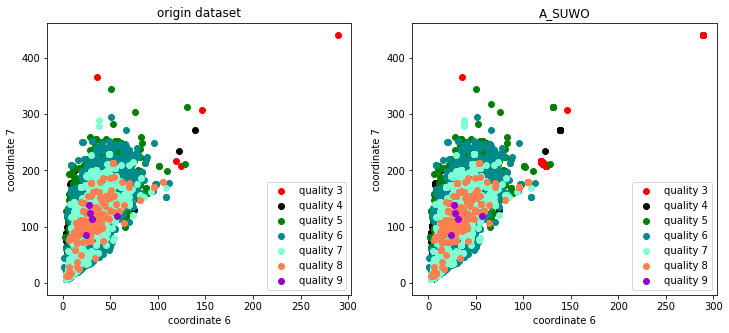

2019-08-20 15:12:07,948:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:12:07,950:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:12:07,951:INFO:AND_SMOTE: Running sampling via ('AND_SMOTE', "{'proportion': 1.0, 'K': 15, 'n_jobs': 1}")
2019-08-20 15:12:09,305:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:12:09,306:INFO:AND_SMOTE: Running sampling via ('AND_SMOTE', "{'proportion': 0.3823915900131406, 'K': 15, 'n_jobs': 1}")
2019-08-20 15:12:09,756:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:12:09,757:INFO:AND_SMOTE: Running sampling via ('AND_SMOTE', "{'proportion': 0.3160320155226777, 'K': 15, 'n_jobs': 1}")
2019-08-20 15:12:09,903:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:12:09,905:INFO:AND_SMOTE: Running sampling via ('AND_SMOTE', "{'proportion': 0.237012987012987, 'K': 15

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


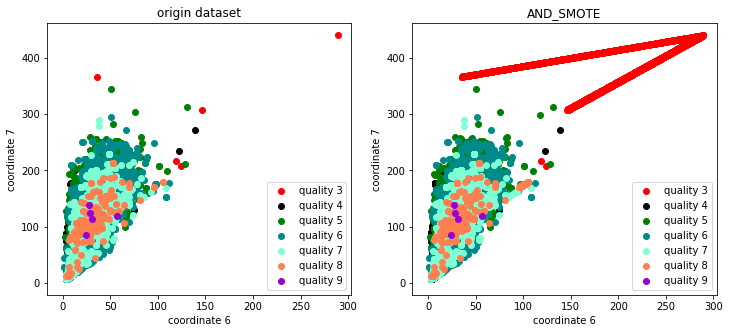

2019-08-20 15:12:11,521:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:12:11,522:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:12:11,523:INFO:NRAS: Running sampling via ('NRAS', "{'proportion': 1.0, 'n_neighbors': 5, 't': 0.5, 'n_jobs': 1}")
2019-08-20 15:12:11,674:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:12:11,675:INFO:NRAS: Running sampling via ('NRAS', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 't': 0.5, 'n_jobs': 1}")
2019-08-20 15:12:11,850:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:12:11,851:INFO:NRAS: Running sampling via ('NRAS', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 't': 0.5, 'n_jobs': 1}")
2019-08-20 15:12:12,663:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:12:12,665:INFO:NRAS: Running sampling via ('NRAS', "{'proportion': 0.2370129

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


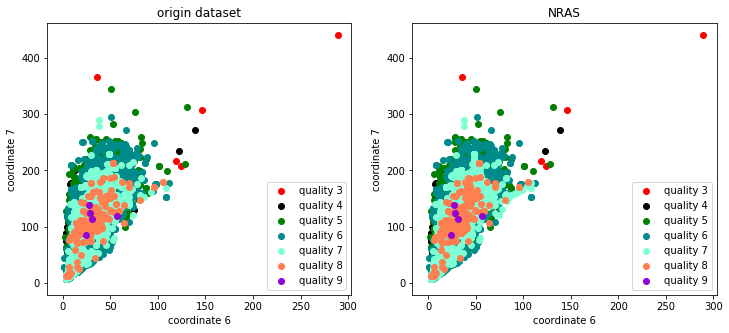

2019-08-20 15:12:14,128:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:12:14,129:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:12:14,131:INFO:SSO: Running sampling via ('SSO', "{'proportion': 1.0, 'n_neighbors': 5, 'h': 10, 'n_iter': 5, 'n_jobs': 1}")
2019-08-20 15:13:02,341:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:13:02,342:INFO:SSO: Running sampling via ('SSO', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'h': 10, 'n_iter': 5, 'n_jobs': 1}")
2019-08-20 15:13:40,352:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:13:40,353:INFO:SSO: Running sampling via ('SSO', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'h': 10, 'n_iter': 5, 'n_jobs': 1}")
2019-08-20 15:14:07,143:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:14:07,144:INFO:SSO: Running sampling via ('SSO

	quality 3 - samples: 30   			quality 3 - samples: 2815
	quality 4 - samples: 214   			quality 4 - samples: 2819
	quality 5 - samples: 2128   			quality 5 - samples: 2818
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2819
	quality 8 - samples: 192   			quality 8 - samples: 2817
	quality 9 - samples: 5   			quality 9 - samples: 2815


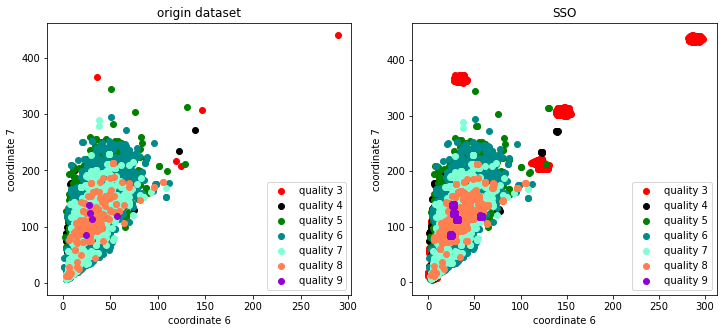

2019-08-20 15:15:29,046:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:15:29,047:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:15:29,048:INFO:NDO_sampling: Running sampling via ('NDO_sampling', "{'proportion': 1.0, 'n_neighbors': 5, 'T': 0.5, 'n_jobs': 1}")
2019-08-20 15:15:29,108:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:15:29,110:INFO:NDO_sampling: Running sampling via ('NDO_sampling', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'T': 0.5, 'n_jobs': 1}")
2019-08-20 15:15:29,157:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:15:29,158:INFO:NDO_sampling: Running sampling via ('NDO_sampling', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'T': 0.5, 'n_jobs': 1}")
2019-08-20 15:15:29,202:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:15:29,204:INFO:NDO_sampling:

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


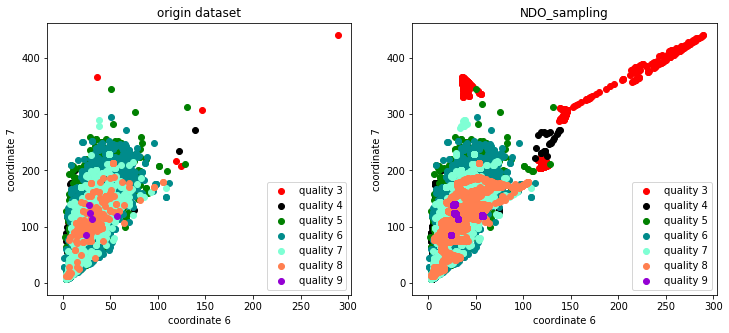

2019-08-20 15:15:30,304:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:15:30,306:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:15:30,307:INFO:DSRBF: Running sampling via ('DSRBF', "{'proportion': 1.0, 'n_neighbors': 5, 'm_min': 4, 'm_max': 10, 'I': 2, 'O': 2, 'n_pop': 500, 'n_init_pop': 5000, 'n_iter': 40, 'n_sampling_epoch': 5, 'n_jobs': 1}")
2019-08-20 15:15:30,309:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:15:59,189:INFO:DSRBF: Iteration 0/40, loss: 0.888411, data size 5640
2019-08-20 15:15:59,483:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 15:16:05,448:INFO:DSRBF: Iteration 1/40, loss: 0.888411, data size 5640
2019-08-20 15:16:08,554:INFO:DSRBF: Iteration 2/40, loss: 0.888218, data size 5640
2019-08-20 15:16:10,676:INFO:DSRBF: Iteration 3/40, loss

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


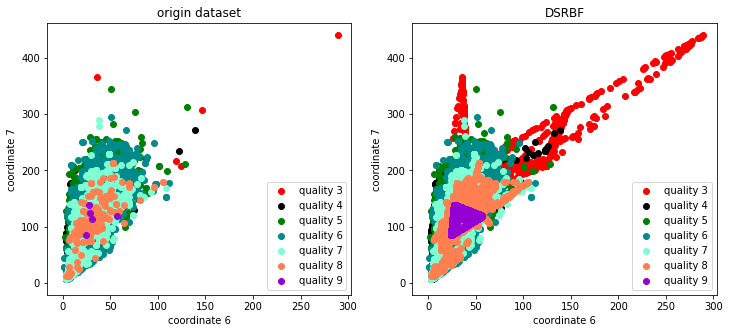

2019-08-20 15:55:55,128:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:55:55,129:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:55:55,130:INFO:Gaussian_SMOTE: Running sampling via ('Gaussian_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'sigma': 1.0, 'n_jobs': 1}")
2019-08-20 15:55:55,208:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:55:55,209:INFO:Gaussian_SMOTE: Running sampling via ('Gaussian_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'sigma': 1.0, 'n_jobs': 1}")
2019-08-20 15:55:55,266:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:55:55,267:INFO:Gaussian_SMOTE: Running sampling via ('Gaussian_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'sigma': 1.0, 'n_jobs': 1}")
2019-08-20 15:55:55,321:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 15:55:5

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


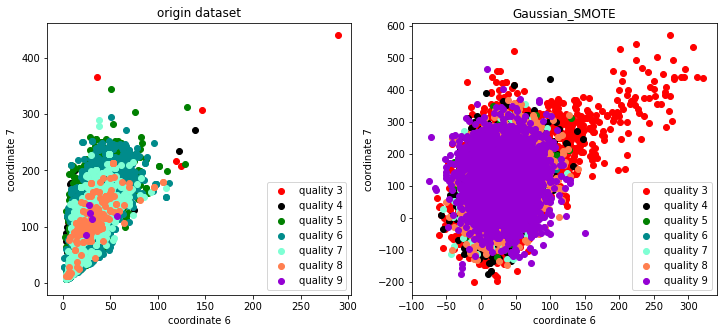

2019-08-20 15:55:56,732:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:55:56,790:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:55:56,792:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1}")
2019-08-20 15:55:57,239:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:55:57,240:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1}")
2019-08-20 15:55:57,725:WARNING:kmeans_SMOTE: number of clusters after filtering is 0
2019-08-20 15:55:57,726:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 15:55:57,727:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_clusters': 10, 'irt': 2.0, 'n

	quality 3 - samples: 30   			quality 3 - samples: 30
	quality 4 - samples: 214   			quality 4 - samples: 214
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 1074
	quality 8 - samples: 192   			quality 8 - samples: 192
	quality 9 - samples: 5   			quality 9 - samples: 5


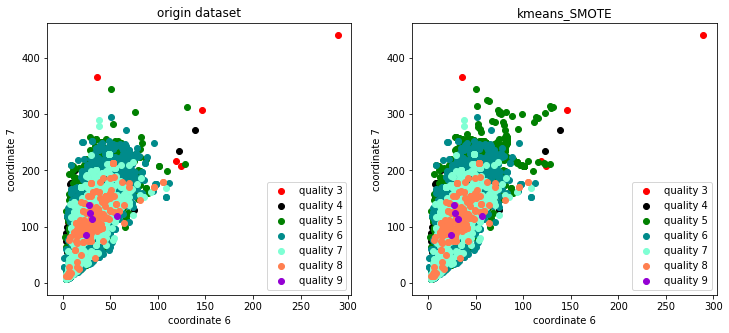

2019-08-20 15:56:00,188:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 15:56:00,189:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 15:56:00,298:INFO:Supervised_SMOTE: Running sampling via ('Supervised_SMOTE', "{'proportion': 1.0, 'th_lower': 0.5, 'th_upper': 1.0, 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=None, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False), 'n_jobs': 1}")
2019-08-20 15:56:03,667:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 15:56:03,671:INFO:Supervised_SMOTE: Running sampling via ('Supervised_SMOTE',

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


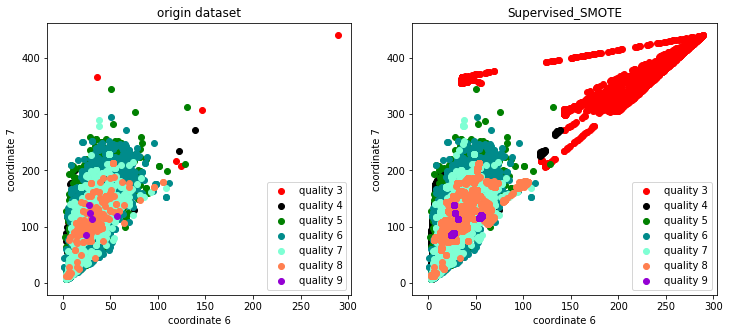

2019-08-20 16:05:26,458:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 16:05:26,459:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 16:05:26,460:INFO:SN_SMOTE: Running sampling via ('SN_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 16:05:27,126:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 16:05:27,128:INFO:SN_SMOTE: Running sampling via ('SN_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 16:05:27,526:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 16:05:27,527:INFO:SN_SMOTE: Running sampling via ('SN_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 5, 'n_jobs': 1}")
2019-08-20 16:05:27,632:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 16:05:27,634:INFO:SN_SMOTE: Running sampling via ('SN_SMOTE', "{'proportion': 0.23701

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


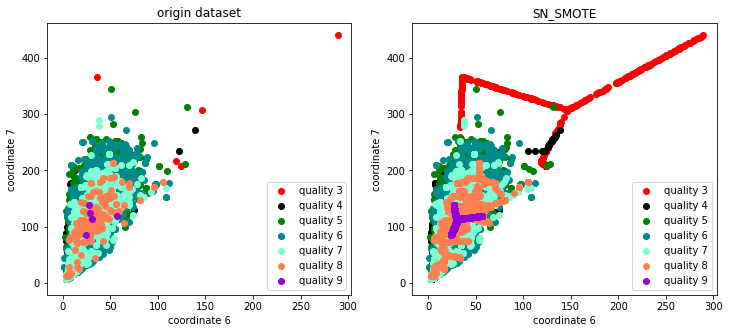

2019-08-20 16:05:28,719:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 16:05:28,720:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 16:05:28,721:INFO:CCR: Running sampling via ('CCR', "{'proportion': 1.0, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1}")
2019-08-20 16:05:29,103:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 16:05:29,105:INFO:CCR: Running sampling via ('CCR', "{'proportion': 0.3823915900131406, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1}")
2019-08-20 16:05:29,696:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 16:05:29,698:INFO:CCR: Running sampling via ('CCR', "{'proportion': 0.3160320155226777, 'energy': 1.0, 'scaling': 0.0, 'n_jobs': 1}")
2019-08-20 16:05:30,294:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 16:05:30,296:INFO:CCR: Running sampling via ('CCR', "{'proportion': 0.237012

	quality 3 - samples: 30   			quality 3 - samples: 2370
	quality 4 - samples: 214   			quality 4 - samples: 2354
	quality 5 - samples: 2128   			quality 5 - samples: 2129
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2149
	quality 8 - samples: 192   			quality 8 - samples: 2308
	quality 9 - samples: 5   			quality 9 - samples: 2355


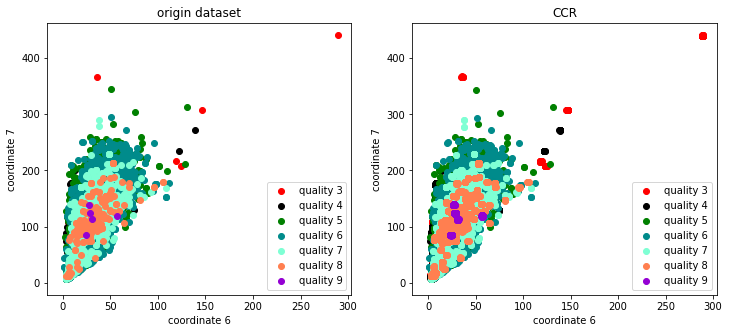

2019-08-20 16:05:32,742:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 16:05:32,744:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 16:05:32,745:INFO:ANS: Running sampling via ('ANS', "{'proportion': 1.0, 'n_jobs': 1}")
2019-08-20 16:05:34,558:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 16:05:34,561:INFO:ANS: Running sampling via ('ANS', "{'proportion': 0.3823915900131406, 'n_jobs': 1}")
2019-08-20 16:05:35,078:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 16:05:35,080:INFO:ANS: Running sampling via ('ANS', "{'proportion': 0.3160320155226777, 'n_jobs': 1}")
2019-08-20 16:05:35,360:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 16:05:35,362:INFO:ANS: Running sampling via ('ANS', "{'proportion': 0.237012987012987, 'n_jobs': 1}")
2019-08-20 16:05:35,542:INFO:MulticlassOversampling: Sampling minor

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 5


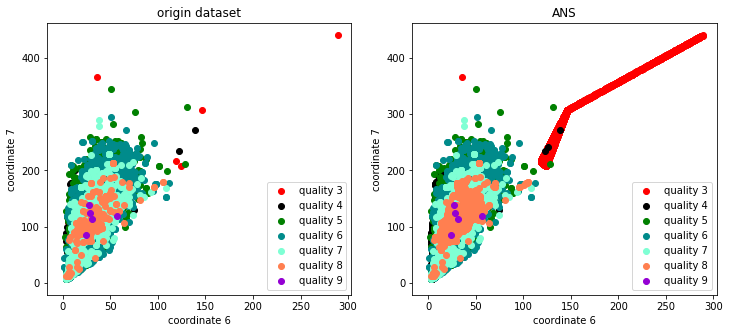

2019-08-20 16:05:36,512:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-08-20 16:05:36,513:INFO:MulticlassOversampling: Sampling minority class with label: 5
2019-08-20 16:05:36,514:INFO:cluster_SMOTE: Running sampling via ('cluster_SMOTE', "{'proportion': 1.0, 'n_neighbors': 3, 'n_clusters': 3, 'n_jobs': 1}")
2019-08-20 16:05:36,821:INFO:MulticlassOversampling: Sampling minority class with label: 7
2019-08-20 16:05:36,822:INFO:cluster_SMOTE: Running sampling via ('cluster_SMOTE', "{'proportion': 0.3823915900131406, 'n_neighbors': 3, 'n_clusters': 3, 'n_jobs': 1}")
2019-08-20 16:05:37,337:INFO:MulticlassOversampling: Sampling minority class with label: 4
2019-08-20 16:05:37,338:INFO:cluster_SMOTE: Running sampling via ('cluster_SMOTE', "{'proportion': 0.3160320155226777, 'n_neighbors': 3, 'n_clusters': 3, 'n_jobs': 1}")
2019-08-20 16:05:38,033:INFO:MulticlassOversampling: Sampling minority class with label: 8
2019-08-20 16:0

	quality 3 - samples: 30   			quality 3 - samples: 2820
	quality 4 - samples: 214   			quality 4 - samples: 2820
	quality 5 - samples: 2128   			quality 5 - samples: 2820
	quality 6 - samples: 2820   			quality 6 - samples: 2820
	quality 7 - samples: 1074   			quality 7 - samples: 2820
	quality 8 - samples: 192   			quality 8 - samples: 2820
	quality 9 - samples: 5   			quality 9 - samples: 2820


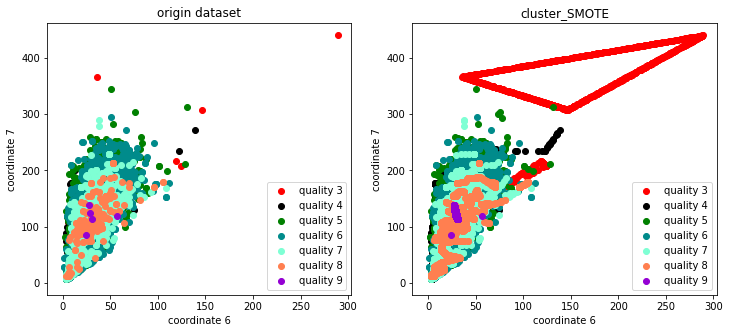

In [323]:
##訓練每一個方法並把圖畫出
for o in range(len(oversamplers)):
    
    oversampler= sv.MulticlassOversampling(sv.get_all_oversamplers_multiclass()[o]())
    X_samp_wine, y_samp_wine= oversampler.sample_equalize_1_vs_many_successive(x_wine_np, y_wine_np)
    plt.figure(figsize=(12, 5))
    ax= plt.subplot(121)
    for i in np.unique(y_wine_np):
        plt.scatter(x_wine_np[y_wine_np == i][:,6], x_wine_np[y_wine_np == i][:,7], label='quality %d' % i, c=colors[i], marker='o')
    plt.title('origin dataset')
    plt.xlabel('coordinate 6')
    plt.ylabel('coordinate 7')
    plt.legend()

    ax= plt.subplot(122)
    for i in np.unique(y_samp_wine):
        print("\tquality %d - samples: %d  " % (i, np.sum(y_wine_np == i)),"\t\t\tquality %d - samples: %d" % (i, np.sum(y_samp_wine == i)))
        plt.scatter(X_samp_wine[y_samp_wine == i][:,6], X_samp_wine[y_samp_wine == i][:,7], label='quality %d' % i, c=colors[i], marker='o')
        plt.title(oversamplers[o].__name__)
        plt.xlabel('coordinate 6')
        plt.ylabel('coordinate 7')
        plt.legend()
        
    plt.show()
    
